### import libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [70]:
# Load dataset
data = pd.read_csv("wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Explore data

In [71]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: >

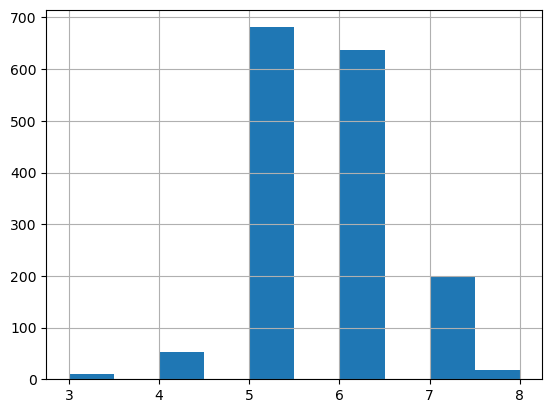

In [74]:
data["quality"].hist()

<Axes: >

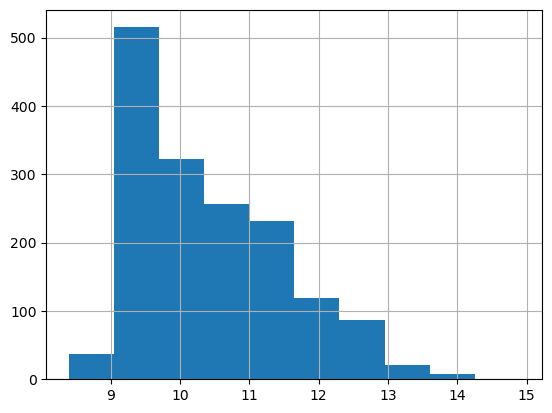

In [75]:
data["alcohol"].hist()

## Prepare the Data for Classification

In [76]:
# Split dataset into features (X) and labels (y)
y = data["quality"] > 5
X = data.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [77]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# standries the data to be near in scale
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [79]:
scaled_X_test = scaler.transform(X_test)

## Modeling

In [12]:
# Initialize and train a Support Vector Classifier (SVC) model
svm_clf = SVC()
svm_clf.fit(scaled_X_train, y_train)

SVC()

In [13]:
# Predict the target variable for the test set using the trained SVC model
y_test_predict = svm_clf.predict(scaled_X_test)
y_test_predict

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True,

## Accuracy Metrics

confution matrix : 
 [[163  50]
 [ 71 196]]


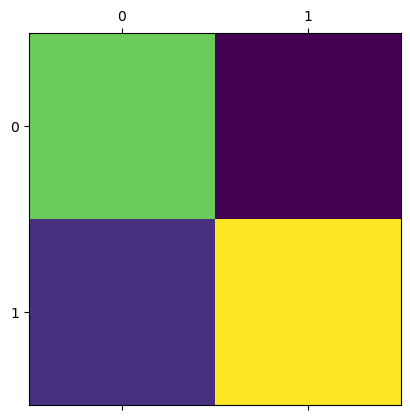

In [14]:
# Compute and visualize the confusion matrix for the SVC model predictions
conf_matrix = confusion_matrix(y_test, y_test_predict)
print("confution matrix : \n",conf_matrix)

plt.matshow(confusion_matrix(y_test, y_test_predict))


In [81]:
# pecision, recall and accuracy

# Calculate precision, recall and accuracy
precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
acc = accuracy_score(y_test, y_test_predict)

# Print the precision and recall
print("Precision is: ", precision)
print("Recall is: ", recall)
print("accuracy is: ", acc)

Precision is:  0.7967479674796748
Recall is:  0.7340823970037453
accuracy is:  0.7479166666666667


0.7496703064830932

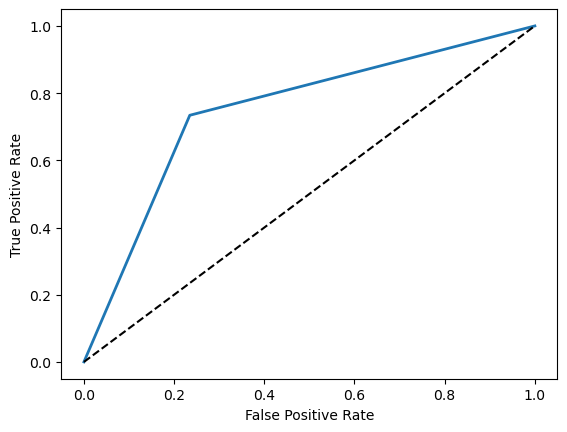

In [82]:
# Roc_Curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

roc_auc_score(y_test, y_test_predict)

In [84]:
# Conclusion for SVC model
print("Conclusion: The SVC model shows good performance with an accuracy of {:.2f}. It is not suitable for problems with complex decision boundaries.".format(acc))


Conclusion: The SVC model shows good performance with an accuracy of 0.75. It is not suitable for problems with complex decision boundaries.


# RandomForestClassifier

In [94]:
# Initialize and train a Random Forest Classifier (RFC) model
rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [95]:
rfc_predictions = rfc.predict(scaled_X_test,)

In [96]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predictions)
rfc_conf_matrix

array([[166,  47],
       [ 49, 218]], dtype=int64)

confution matrix : 
 [[166  47]
 [ 49 218]]


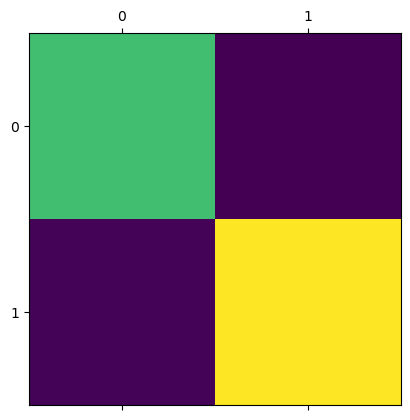

In [97]:
conf_matrix = confusion_matrix(y_test, rfc_predictions)
print("confution matrix : \n",conf_matrix)

plt.matshow(confusion_matrix(y_test, rfc_predictions))


In [98]:
# pecision, recall and accuracy

# Calculate precision, recall and accuracy
precision = precision_score(y_test, rfc_predictions)
recall = recall_score(y_test, rfc_predictions)
acc = accuracy_score(y_test, rfc_predictions)

# Print the precision and recall
print("Precision is: ", precision)
print("Recall is: ", recall)
print("accuracy is: ", acc)

Precision is:  0.8226415094339623
Recall is:  0.8164794007490637
accuracy is:  0.8


Text(0, 0.5, 'True Positive Rate')

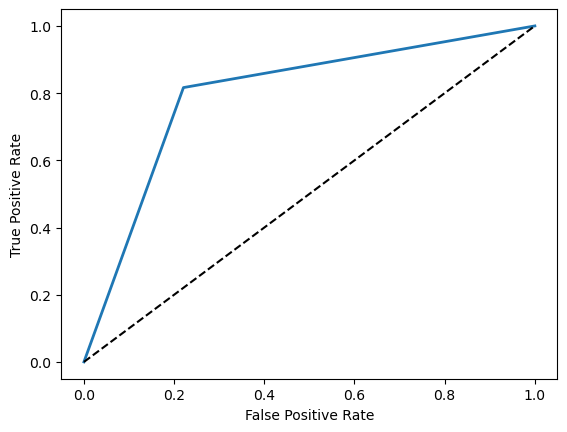

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [100]:
roc_auc_score(y_test, rfc_predictions)

0.7979110618768792

In [101]:
# Conclusion for RFC model
print("Conclusion: The Random Forest model demonstrates robust performance with an accuracy of {:.2f}. It is well-suited for handling large datasets and capturing non-linear relationships.".format(acc))


Conclusion: The Random Forest model demonstrates robust performance with an accuracy of 0.80. It is well-suited for handling large datasets and capturing non-linear relationships.


# Multi-Class Classification

In [24]:
multi_class = data.copy()
multi_class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
multi_class_mapper = {3:"Bad", 4:"Bad", 5:"Normal", 6:"Normal", 7:"Good", 8:"Good"}
multi_class_mapper

{3: 'Bad', 4: 'Bad', 5: 'Normal', 6: 'Normal', 7: 'Good', 8: 'Good'}

In [26]:
multi_class_y = multi_class["quality"].map(multi_class_mapper)
multi_class_y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1594    Normal
1595    Normal
1596    Normal
1597    Normal
1598    Normal
Name: quality, Length: 1599, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, multi_class_y_train, multi_class_y_test = train_test_split(X, multi_class_y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, multi_class_y_train)

RandomForestClassifier()

In [29]:
multi_predictions = rfc.predict(scaled_X_test)

confution matrix : 
 [[  0   0  18]
 [  0  37  30]
 [  0  21 374]]


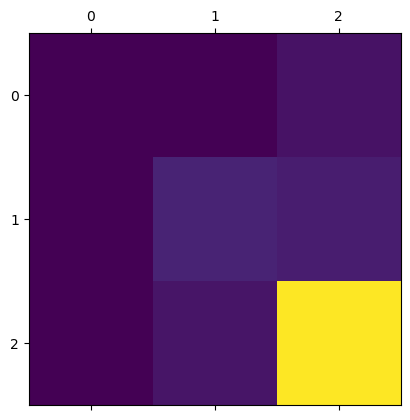

In [31]:
multi_matrix = confusion_matrix(multi_class_y_test, multi_predictions)
print("confution matrix : \n",multi_matrix)

plt.matshow(confusion_matrix(multi_class_y_test, multi_predictions))


# Multi-Label Classifier

In [38]:
quality = data["quality"] > 5
alcohol = data["alcohol"] > 10
y_multi_label = np.c_[alcohol, quality]
y_multi_label

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [ True,  True],
       [ True, False],
       [ True,  True]])

In [40]:
x_multi_label = data.iloc[:, :-2]
x_multi_label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [41]:
from sklearn.model_selection import train_test_split

multi_label_X_train, multi_label_X_test, multi_label_y_train, multi_label_y_test = train_test_split(x_multi_label, y_multi_label, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

multi_label_scaled_X_train = scaler.fit_transform(X_train)
multi_label_scaled_X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(multi_label_X_train, multi_label_y_train)

KNeighborsClassifier()

In [45]:
multi_label_predictions = knn_clf.predict(multi_label_X_test)
multi_label_predictions[:]

array([[False,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [ True,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [False, False],
       [ True,  True],
       [Fal

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels and predictions as multi_label_y_test and multi_label_predictions
# Example for accuracy
accuracy = accuracy_score(multi_label_y_test, multi_label_predictions)


# Example for Precision, Recall, and F1 Score
precision = precision_score(multi_label_y_test, multi_label_predictions, average='samples')
recall = recall_score(multi_label_y_test, multi_label_predictions, average='samples')
f1 = f1_score(multi_label_y_test, multi_label_predictions, average='samples')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.409375
Precision: 0.4234375
Recall: 0.4328125
F1 Score: 0.409375


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([[ 92,  59],
       [ 59, 110]], dtype=int64)

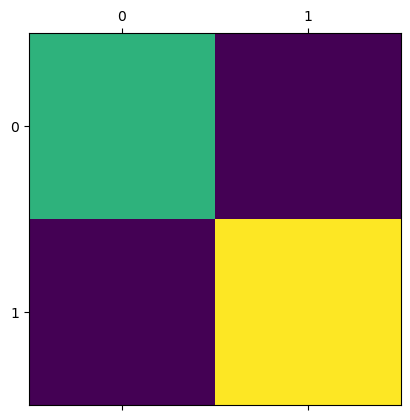

In [52]:
alc_predictions = [i[0] for i in multi_label_predictions]
qual_predictions = [i[1] for i in multi_label_predictions]

alc_test = [i[0] for i in multi_label_y_test]
qual_test = [i[1] for i in multi_label_y_test]

alc_confusion_matrix = confusion_matrix(alc_test, alc_predictions)
qual_confusion_matrix = confusion_matrix(qual_test, qual_predictions)


plt.matshow(alc_confusion_matrix)
alc_confusion_matrix

array([[ 69,  72],
       [ 72, 107]], dtype=int64)

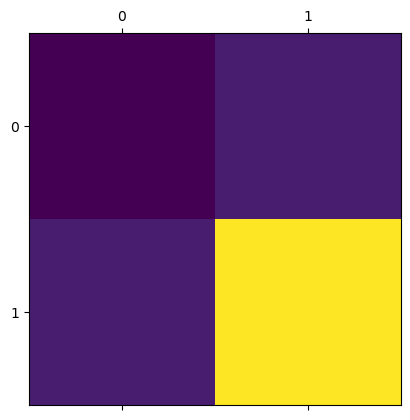

In [53]:
plt.matshow(qual_confusion_matrix)
qual_confusion_matrix

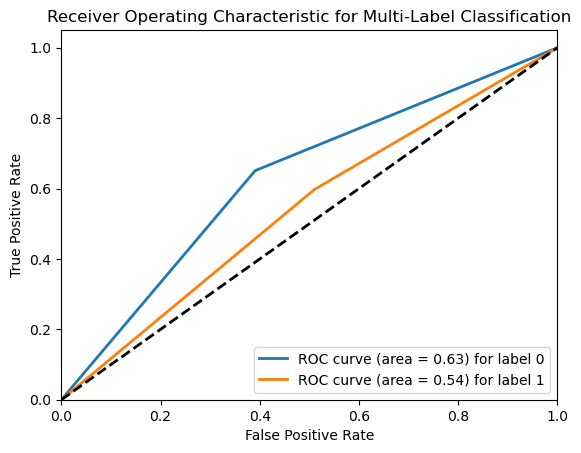

In [49]:
# Number of labels
n_classes = multi_label_y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(multi_label_y_test[:, i], multi_label_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {i}')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Label Classification')
plt.legend(loc="lower right")
plt.show()


In [102]:
# Conclusion for Multi-label Classification
print("Conclusion: The ROC curves and AUC scores provide insights into the performance of the multi-label classification model. Each label's ROC curve helps in understanding the model's ability to distinguish between classes.")

Conclusion: The ROC curves and AUC scores provide insights into the performance of the multi-label classification model. Each label's ROC curve helps in understanding the model's ability to distinguish between classes.
